# Project

# InstaBot - Part 2

Your friend has opened a new Food Blogging handle on Instagram and wants to get famous. He wants to follow a lot of people so that he can get noticed quickly but it is a tedious task so he asks you to help him. As you have just learned automation using Selenium, you decided to help him by creating an Instagram Bot. You need to create different functions for each task.

### Importing all the required libraries and Creating a web driver session

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def webdriverSession(url):
    driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))
    driver.maximize_window()
    driver.get(url)
    return driver

url = 'https://www.instagram.com/'
driver = webdriverSession(url)

### Login to your Instagram Handle and Submit with sample username and password

In [3]:
def LogIn(driver, username, password):
    u_name = wait.until(EC.presence_of_element_located((By.NAME, 'username')))
    u_pass = wait.until(EC.presence_of_element_located((By.NAME, 'password')))
    u_name.send_keys(username)
    u_pass.send_keys(password)

    login = driver.find_element(By.XPATH, '// button[contains(@type,"submit")]')
    login.click()
    
    try:
        save_info = wait.until(EC.presence_of_element_located((By.XPATH, '// div[@class = "cmbtv"]/button')))
        save_info.click()
    except TimeoutException:
        pass

    # Handling Turn On Notifications window
    try:
        notification = wait.until(EC.presence_of_element_located((By.XPATH, '// button[contains(@class, "_a9_1")]')))
        notification.click()
    except TimeoutException:
        pass
    finally:
        print('You have successfully Logged In')
        
wait = WebDriverWait(driver,10)
username = 'SAMPLE USERNAME'
password = 'SAMPLE PASSWORD'
LogIn(driver, username, password)
time.sleep(2)

You have successfully Logged In


## 1). Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
### 1.1). From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

#### Searching "food" and obtaining handles

In [4]:
def SearchText(driver, text):
    search_box = wait.until(EC.presence_of_element_located((By.XPATH, '// div[@class = "_aaw9"]')))
    search_box.click()
    try:
        clear = driver.find_element(By.CLASS_NAME, '_9-lv')
        clear.click()
    except:
        pass
    input_k = wait.until(EC.presence_of_element_located((By.XPATH, '//nav//input')))
    input_k.send_keys(text)
    
    time.sleep(3)

def FindingHandles(driver, text):
    SearchText(driver, text)
    handle = driver.find_element(By.CLASS_NAME, '_abnx')
    handles = handle.find_elements(By.CLASS_NAME, '_aacw')
    
    profiles = []
    for i in handles:
        h = i.get_attribute('innerHTML')
        if h[0]=='#':
            continue
        profiles.append(h)
    
    clear = driver.find_element(By.CLASS_NAME, '_9-lv')
    clear.click()
    time.sleep(2)
    return profiles
    
text = 'food'
profiles = FindingHandles(driver, text)
profiles

['foodie_incarnate',
 'cg_food_lover',
 'foodzeee',
 'food_.gallery_',
 'foodranchi',
 'kolkatasutrafood',
 'food',
 'foodsbible',
 'delhifoodwalks',
 'bhilaifoood',
 'dilsefoodie',
 'eatsureofficial',
 'food52',
 'beardmeatsfood',
 'foodbible',
 'raipurfoodielove',
 'foodmedia09',
 'food_for_life_kolkata24',
 'foodie.raipurian',
 '__kamina_food_vlogs__',
 'food.darzee',
 'indian_tasty_food',
 'musafir.naveed',
 'yourfoodlab',
 'epicurean_tastes',
 'food_buzz_',
 '365foodies',
 'bright_colour_lens',
 'voomplafood',
 'raipurfood_byora',
 'raipurfoodpedia',
 'foodie_ankitjsr',
 'fatgirlkitchenchronicle',
 'the.hungrydodo',
 'cg_food_and_travel',
 'blissful_food_plates',
 'foodvoyagerbadhan',
 'foodnartstories',
 'bongeats',
 'foodie_traveller0',
 'foodinsider',
 'thefoodietakesflight',
 'Lemon Chilli - Fun N Food park',
 'foods_taa',
 'the_everyday_food',
 'thefoodiecam',
 'Food Factory',
 'thecrazyindianchef',
 'Big Bazaar Dhanbad Chowpatty Food Court',
 'foodguy24',
 'bengali_sweets_an

In [5]:
def OpenProfile(driver, profile_name):
    SearchText(driver, profile_name)
    handle = driver.find_element(By.CLASS_NAME, '_abnx')
    handles = handle.find_elements(By.CLASS_NAME, '_aacw')

    for i in handles:
        h = i.get_attribute('innerHTML')
        if h == profile_name:
            try:
                i.click()
                print('We have Successfully opened the profile of', h )
                break
            except:
                break

In [6]:
followers = {}
count = 0
for i in profiles:
    try:
        OpenProfile(driver, i)
        li = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_aa_5')))
        f = li[1].text.split()[0]
        if f[-1]=='K':
            f = float(f[:-1]) * 1000
        elif f[-1]=='M':
            f = float(f[:-1]) * 1000000
        else:
            f = float("".join(f.split(',')))
        print(f)
        followers[i] = f
        driver.back()
        time.sleep(2)
        count += 1
        if count==10:
            break
    except:
        clear = driver.find_element(By.CLASS_NAME, '_9-lv')
        clear.click()
        pass

followers

We have Successfully opened the profile of foodie_incarnate
1300000.0
We have Successfully opened the profile of cg_food_lover
3534.0
We have Successfully opened the profile of foodzeee
1300000.0
We have Successfully opened the profile of food_.gallery_
76.0
We have Successfully opened the profile of foodranchi
130000.0
We have Successfully opened the profile of kolkatasutrafood
42900.0
We have Successfully opened the profile of foodsbible
7000000.0
We have Successfully opened the profile of delhifoodwalks
174000.0
We have Successfully opened the profile of bhilaifoood
2841.0
We have Successfully opened the profile of dilsefoodie
1000000.0


{'foodie_incarnate': 1300000.0,
 'cg_food_lover': 3534.0,
 'foodzeee': 1300000.0,
 'food_.gallery_': 76.0,
 'foodranchi': 130000.0,
 'kolkatasutrafood': 42900.0,
 'foodsbible': 7000000.0,
 'delhifoodwalks': 174000.0,
 'bhilaifoood': 2841.0,
 'dilsefoodie': 1000000.0}

In [7]:
top_handles = sorted(followers, key=lambda x:followers[x], reverse=True)
top5_handles = top_handles[:5]
for handle in top5_handles:
    print(handle, ':', followers[handle])

foodsbible : 7000000.0
foodie_incarnate : 1300000.0
foodzeee : 1300000.0
dilsefoodie : 1000000.0
delhifoodwalks : 174000.0


### 1.2). Now Find the number of posts these handles have done in the previous 3 days.

In [8]:
posts_count = {}
for profile in top5_handles:
    OpenProfile(driver, profile)
    time.sleep(2)
    post = driver.find_element(By.CLASS_NAME, '_aanf')
    post.click()
    count = 0
    day = 0
    while True:
        t = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_aa-b'))).text.split()
        if 'DAY' in t or 'DAYS' in t:
            if int(t[0]) <= 3:
                count+=1
            else:
                break
        elif 'HOUR' in t or 'HOURS' in t or 'MINUTE' in t or 'MINUTES' in t:
            count += 1
        else:
            break
        nxt = driver.find_element(By.CLASS_NAME, '_aaqg')
        nxt.click()
    print(profile, 'have done', count, 'posts in the previous 3 days')
    posts_count[profile] = count
    
    close = driver.find_element(By.CLASS_NAME, 'futnfnd5')
    close.click()
    time.sleep(1)
home = driver.find_element(By.CLASS_NAME, '_acrd')
home.click()

We have Successfully opened the profile of foodsbible
foodsbible have done 8 posts in the previous 3 days
We have Successfully opened the profile of foodie_incarnate
foodie_incarnate have done 6 posts in the previous 3 days
We have Successfully opened the profile of foodzeee
foodzeee have done 1 posts in the previous 3 days
We have Successfully opened the profile of dilsefoodie
dilsefoodie have done 4 posts in the previous 3 days
We have Successfully opened the profile of delhifoodwalks
delhifoodwalks have done 7 posts in the previous 3 days


### 1.3). Depict this information using a suitable graph.

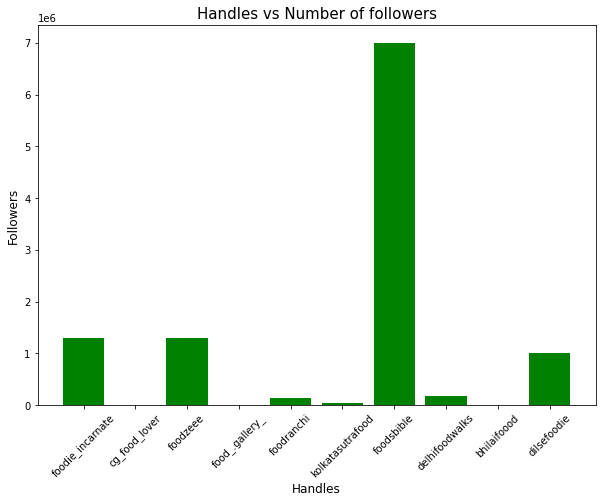

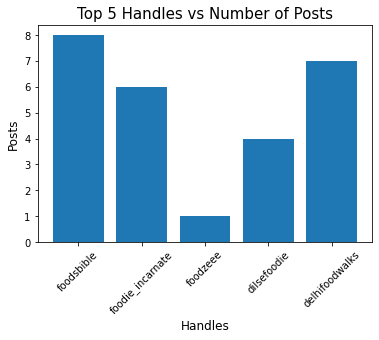

In [9]:
x = followers.keys()
y = followers.values()
plt.figure(figsize=(10, 7))
plt.bar(x,y, color='green')
plt.xticks(rotation=45)
plt.title('Handles vs Number of followers', size=15)
plt.xlabel('Handles', size=12)
plt.ylabel('Followers', size=12)
plt.show()

x = top5_handles
y = [x for x in posts_count.values()]
plt.bar(x,y)
plt.xticks(rotation=45)
plt.title('Top 5 Handles vs Number of Posts', size=15)
plt.xlabel('Handles', size=12)
plt.ylabel('Posts', size=12)
plt.show()

## 2). Your friend also needs a list of hashtags that he should use in his posts.
### 2.1). Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
### 2.2). Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [12]:
contents = []
hashtags = {}
for i in top5_handles:
    OpenProfile(driver, i)
    
    posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_aanf')))
    count = 0
    for post in posts:
        post.click()
        texts = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_a9zs')))
        contents.append(texts.get_attribute('textContent'))
        
        hashes = texts.find_elements(By.TAG_NAME, 'a')
        for ele in hashes:
            h = ele.get_attribute('innerHTML')
            if h[0]!='@' or h!='':
                hashtags[h] = hashtags.get(h, 0) + 1
        
        driver.back()
        time.sleep(2)
        count+=1
        if count==10:
            break
    driver.back()
    time.sleep(2)
    
contents

We have Successfully opened the profile of foodsbible
We have Successfully opened the profile of foodie_incarnate
We have Successfully opened the profile of foodzeee
We have Successfully opened the profile of dilsefoodie
We have Successfully opened the profile of delhifoodwalks


['Remy’s Omelette 🍳😍(📷: @albert_cancook)',
 'Eat or Pass? 🤔😋(📷: @bayashi_tv)',
 'Worlds Hottest Dry Age 🔥🥩(📷: @maxthemeatguy)',
 'Cloud Cake ☁️🎂 (📷: beautyhomeflour / TikTok)',
 'Pasta Carbonara 🍝🤤(📷: @notorious_foodie)',
 '6 Layer Brownie 🍫😍Song: M P D + by @darwins.ilva (📷: @fitwaffle)',
 'Rate this meal 1-10! 🍖🥔(📷: @saidakromchef)',
 'Eggplant Vodka Parm Panini 🍆😍 (📷: @bnaporkstore)',
 'Eat or Pass? 🤔😍(📷: @sadfman)',
 'Stuffed Cabbage Rolls 😋 (📷: @umihito.vlog)',
 "Making of INDIA'S BIGGEST PARATHA😱😱.Kindly watch the full video for location, price and all other details🤗🤗.#foodieincarnate #sodelhi #newdelhi #foodtalkindia #delhigram #indianfood #delhifoodblogger #foodgasm #foodporn #foodpornshare #foodlover #foodgram #foodiesofinstagram #foodie #indianstreetfood #streetfood #delhistreetfood #streetfoodindia #mumbaistreetfood #delhifoodie #foodblogger #indianfoodie #desikhana #indianfoodblogger #indianfoodbloggers #delhifood #mumbai #delhi #paratha #Jaipur",
 'Gadadhaari Shikanji of P

In [13]:
hashtags

{'@albert_cancook': 1,
 '@bayashi_tv': 1,
 '@maxthemeatguy': 1,
 '@notorious_foodie': 1,
 '@darwins.ilva': 1,
 '@fitwaffle': 1,
 '@saidakromchef': 1,
 '@bnaporkstore': 1,
 '@sadfman': 1,
 '@umihito.vlog': 1,
 '#foodieincarnate': 10,
 '#sodelhi': 7,
 '#newdelhi': 7,
 '#foodtalkindia': 7,
 '#delhigram': 7,
 '#indianfood': 6,
 '#delhifoodblogger': 6,
 '#foodgasm': 4,
 '#foodporn': 4,
 '#foodpornshare': 4,
 '#foodlover': 4,
 '#foodgram': 4,
 '#foodiesofinstagram': 4,
 '#foodie': 4,
 '#indianstreetfood': 5,
 '#streetfood': 11,
 '#delhistreetfood': 5,
 '#streetfoodindia': 5,
 '#mumbaistreetfood': 5,
 '#delhifoodie': 4,
 '#foodblogger': 6,
 '#indianfoodie': 6,
 '#desikhana': 6,
 '#indianfoodblogger': 6,
 '#indianfoodbloggers': 6,
 '#delhifood': 6,
 '#mumbai': 5,
 '#delhi': 6,
 '#paratha': 1,
 '#Jaipur': 1,
 '#reelitfeelit': 3,
 '#reelkarofeelkaro': 3,
 '#reelsinstagram': 3,
 '#reels': 4,
 '#patna': 1,
 '#bihar': 1,
 '#viralfood': 3,
 '#explore': 3,
 '#desifood': 3,
 '#pune': 1,
 '#gurugram': 

### 2.3). Create a csv file with two columns : the word and its frequency

In [14]:
hash_words = np.array([i[1:] for i in hashtags.keys()])
hash_freq = np.array([i for i in hashtags.values()])
hash_words = hash_words[np.argsort(hash_freq)][::-1]
hash_freq = hash_freq[np.argsort(hash_freq)][::-1]

df = pd.DataFrame()
df['Words'] = hash_words
df['Frequency'] = hash_freq
df.to_csv('Hashtags_frequencies.csv')

### 2.4). Now, find the hashtags that were most popular among these bloggers

In [15]:
for i in range(len(hash_words)):
    print(hash_words[i], '---->', hash_freq[i], 'times')

streetfood ----> 11 times
foodieincarnate ----> 10 times
dilsecouple ----> 9 times
dilsefoodie ----> 9 times
foodzeee ----> 8 times
delhigram ----> 7 times
newdelhi ----> 7 times
sodelhi ----> 7 times
foodtalkindia ----> 7 times
sgr777food ----> 7 times
indianfoodblogger ----> 6 times
indianfoodie ----> 6 times
delhifoodblogger ----> 6 times
indianfood ----> 6 times
desikhana ----> 6 times
foodblogger ----> 6 times
recipe ----> 6 times
delhi ----> 6 times
delhifood ----> 6 times
indianfoodbloggers ----> 6 times
mumbaistreetfood ----> 5 times
streetfoodindia ----> 5 times
mumbai ----> 5 times
delhistreetfood ----> 5 times
indianstreetfood ----> 5 times
foodgram ----> 4 times
foodie ----> 4 times
foodiesofinstagram ----> 4 times
delhifoodie ----> 4 times
foodlover ----> 4 times
breakfasttour ----> 4 times
reels ----> 4 times
foodexploration ----> 4 times
foodpornshare ----> 4 times
foodwalkawithanubhav ----> 4 times
kanpurfoodies ----> 4 times
dfwinkanpur ----> 4 times
foodgasm ----> 4 t

### 2.5). Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

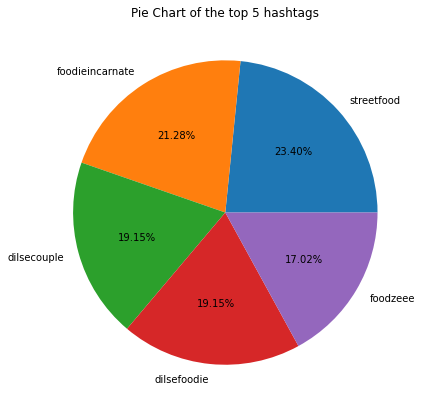

In [16]:
plt.figure(figsize=(7, 7))
plt.pie(hash_freq[:5], labels=hash_words[:5], autopct='%.2f%%')
plt.title('Pie Chart of the top 5 hashtags')
plt.show()

## 3). You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
### 3.1). Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [18]:
likes = {}
for profile in top5_handles:
    OpenProfile(driver, profile)
    
    posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_aanf')))
    count = 0
    for post in posts:
        post.click()
        try:
            l = wait.until(EC.presence_of_element_located((By.XPATH, '//section[@class = "_aa-7"]//span')))
            num = l.text
            if len(num.split())==2:
                l.click()
                num = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_aauu'))).text.split()[0]
            num = int("".join(num.split(',')))
            likes[profile] = likes.get(profile, 0) + num
        except:
            driver.back()
            time.sleep(1)
            continue
        print(num)
        driver.back()
        time.sleep(2)
        
        count+=1
        if count==10:
            break
    driver.back()
    time.sleep(2)
    
for ele in likes:
    print(ele, ':', likes[ele], 'likes')

We have Successfully opened the profile of foodsbible
38288
118761
35315
76311
121192
73029
76071
37943
174546
146929
We have Successfully opened the profile of foodie_incarnate
12440
21948
5534
16246
30745
9356
16746
20285
11193
18791
We have Successfully opened the profile of foodzeee
31197
27152
22637
51331
10089
53452
127131
81722
110001
28894
We have Successfully opened the profile of dilsefoodie
2263
10938
2960
6696
3845
4196
6739
4036
25139
7405
We have Successfully opened the profile of delhifoodwalks
154
260
856
309
3895
569
1267
577
1641
1114
foodsbible : 898385 likes
foodie_incarnate : 163284 likes
foodzeee : 543606 likes
dilsefoodie : 74217 likes
delhifoodwalks : 10642 likes


### 3.2). Calculate the average likes for a handle.

In [19]:
avg_likes = {}
for i in likes:
    avg_likes[i] = int(likes[i]/10)
for ele in avg_likes:
    print(ele, ':', avg_likes[ele], 'average likes')

foodsbible : 89838 average likes
foodie_incarnate : 16328 average likes
foodzeee : 54360 average likes
dilsefoodie : 7421 average likes
delhifoodwalks : 1064 average likes


### 3.3). Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [20]:
avg_ratio = {}
for i in avg_likes:
    avg_ratio[i] = int(followers[i]/avg_likes[i])
for ele in avg_ratio:
    print(ele, ':', avg_likes[ele], 'average ratio')

foodsbible : 89838 average ratio
foodie_incarnate : 16328 average ratio
foodzeee : 54360 average ratio
dilsefoodie : 7421 average ratio
delhifoodwalks : 1064 average ratio


### 3.4). Create a bar graph to depict the above obtained information.

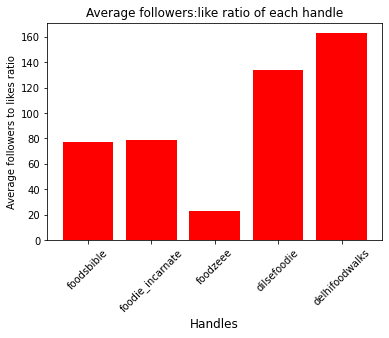

In [21]:
plt.bar(avg_ratio.keys(), avg_ratio.values(), color='red')
plt.title('Average followers:like ratio of each handle')
plt.xticks(rotation=45)
plt.xlabel('Handles', size=12)
plt.ylabel('Average followers to likes ratio')
plt.show()

In [22]:
driver.quit()